# Import library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Panggil (import) gambar

In [2]:
# Baca citra dari file
image = cv2.imread('poto.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Filter median

In [3]:
# Filter median menggunakan OpenCV
median_filtered = cv2.medianBlur(image_rgb, 5)

# Filter rata-rata (mean) manual

In [6]:
# Implementasi manual dari filtering rata-rata (mean)  
def mean_filter(image, kernel_size=3):
    # Mencari dimensi gambar
    rows, cols, channels = image.shape
    # Mendeklarasi output hasil filter
    filtered_image = np.zeros_like(image)
    # Mendeklarasi kernel
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    
    # Pad the image
    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant', constant_values=0)
    
    # Melakukan filtering
    for i in range(rows):
        for j in range(cols):
            for k in range(channels):
                region = padded_image[i:i+kernel_size, j:j+kernel_size, k]
                filtered_image[i, j, k] = np.sum(region * kernel)
    
    return filtered_image

# Filter rata-rata dalam skala keabuan (grayscale)

In [7]:
# Konversi ke grayscale
mean_filtered = mean_filter(image_rgb, kernel_size=3)
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
mean_filtered_gray = cv2.cvtColor(mean_filtered, cv2.COLOR_RGB2GRAY)

# Menampilkan citra tergabung (sesuai soal)

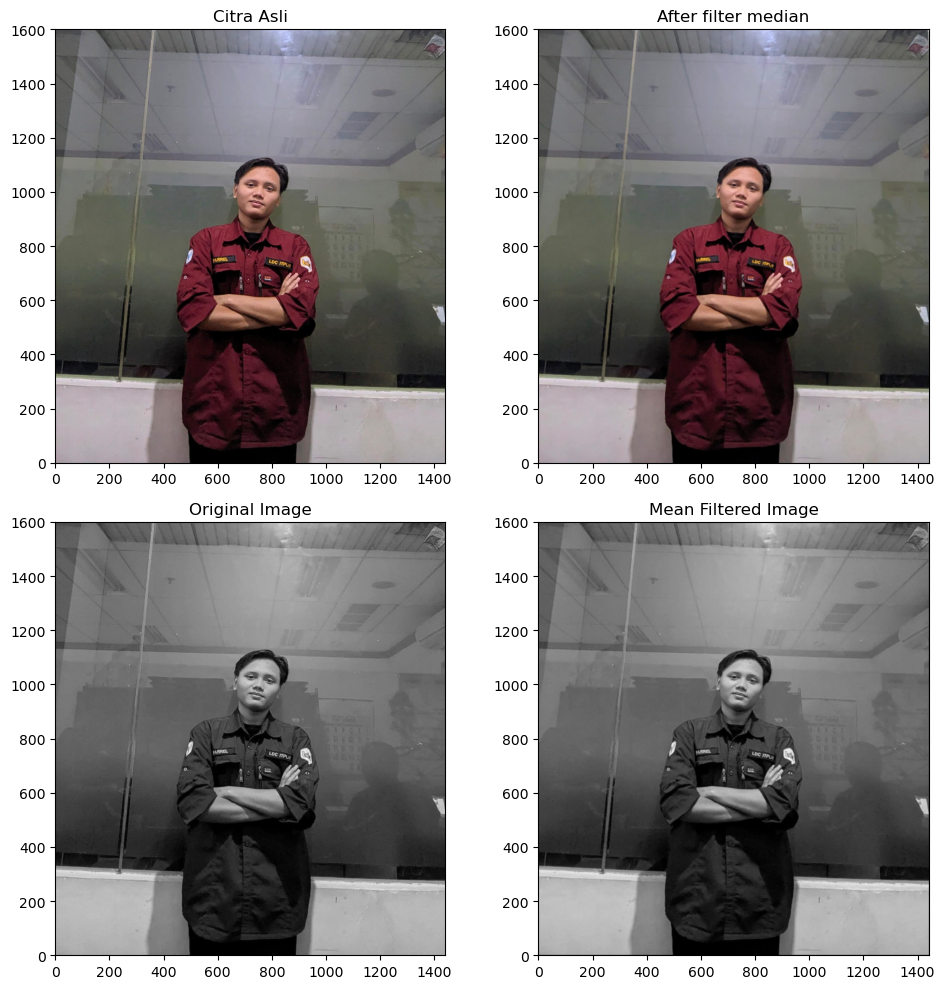

In [8]:
# Plot the original and filtered images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Citra Original
axs[0, 0].imshow(image_rgb, extent=[0, 1440, 0, 1600])
axs[0, 0].set_title('Citra Asli')
axs[0, 0].set_xlim(0, 1440)
axs[0, 0].set_ylim(0, 1600)

# Citra filter medi
axs[0, 1].imshow(median_filtered, extent=[0, 1440, 0, 1600])
axs[0, 1].set_title('After filter median')
axs[0, 1].set_xlim(0, 1440)
axs[0, 1].set_ylim(0, 1600)

# Original grayscale image
axs[1, 0].imshow(image_gray, cmap='gray', extent=[0, 1440, 0, 1600])
axs[1, 0].set_title('Original Image')
axs[1, 0].set_xlim(0, 1440)
axs[1, 0].set_ylim(0, 1600)

# Mean filtered grayscale image
axs[1, 1].imshow(mean_filtered_gray, cmap='gray', extent=[0, 1440, 0, 1600])
axs[1, 1].set_title('Mean Filtered Image')
axs[1, 1].set_xlim(0, 1440)
axs[1, 1].set_ylim(0, 1600)

plt.tight_layout()
plt.show()
